## T21 - Supervised Learning – Random Forests

### Practical task

Create a Jupyter notebook called random_forest_titantic.ipynb.

1. Load, clean, and preprocess the data from the titanic.csv file. You may reuse any code you may have used previously to clean and preprocess this dataset.

2. Create a random forest to predict the survival of passengers on the Titanic.

3. From the random forest model, determine which of the features is the one that contributes the most to predicting whether a passenger survives or not.

4. Tune the n_estimators (the number of trees in the model) and max_depth (the maximum depth of each tree) parameters.

5. Report the accuracy of all models and report which model performed the best, including the values for n_estimators and max_depth that the best model had.

### Challenge

Use this opportunity to extend yourself by completing an optional challenge activity.

Follow these steps:

- Add to your random_forest_titantic.ipynb Jupyter notebook by creating a bagged and boosted tree to predict the survival of passengers on the Titanic.

- Tune the n_estimators (the number of trees in the model) and max_depth (the maximum depth of each tree) parameters for the bagged and boosted tree models.

- Report the accuracy of all models and report which model performed the best, including the values for n_estimators and max_depth that the best model had.


### 1.1. Data Loading

In [4]:
# Step 1.1 Load the dataset

# Import libraries
import pandas as pd

# Load the titanic dataset
titanic_df = pd.read_csv("titanic.csv")

In [5]:
# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Print Information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.2. Data Cleaning and Preprocessing

In [4]:
# Step 2.1 Data Cleaning

titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)
titanic_df.drop("Fare", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)


### One-Hot Encoding
One-hot encoding is a technique used to transform categorical variables into a numerical format, making them suitable for machine learning algorithms. It works by creating new binary columns for each unique category in the original variable, where each column represents one possible category. This way, the categorical data is converted into a format that algorithms can easily process without assuming any inherent order or priority between the categories. For instance, in the 'Sex' column, which contains categories such as 'male' and 'female', one-hot encoding would generate two new columns, one for each category, with a binary value of 1 or 0 to indicate the presence of that category for each record.

In [5]:
# Step 2.2 Handling categorical data

# Step 2.2.1 Return unique values from the Sex column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine learning classifiers are unable to handle string values directly, so categorical data must be converted into a numerical form. There are two primary methods for doing this:

1. **Label Encoding**: This technique assigns a unique integer to each category, such as 0 for 'male' and 1 for 'female'. However, this approach introduces a problem—by using numbers, it suggests a ranking or order between the categories, which can confuse some machine learning models into thinking one category is inherently 'greater' than the other.

2. **One-Hot Encoding**: This method avoids the issue of implied order by creating separate binary columns for each category. For example, instead of assigning numbers to 'male' and 'female', one-hot encoding creates two new columns—`Sex_male` and `Sex_female`. If a person is `male`, there will be a 1 in the `Sex_male` column and a 0 in the `Sex_female` column, and vice versa for females. This method ensures each category is treated independently, without any implied hierarchy.

In pandas, a straightforward way to perform one-hot encoding is by using the `get_dummies()` function, which automatically generates these binary columns for categorical variables in your dataset.

In [6]:
# Step 1.2.2 Apply one-hot encoding to the 'Sex' column
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.drop("Sex_male", axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_female
0,0,3,22.0,1,0,S,False
1,1,1,38.0,1,0,C,True
2,1,3,26.0,0,0,S,True
3,1,1,35.0,1,0,S,True
4,0,3,35.0,0,0,S,False


Now, we do the same to the "Embarked" column.

In [7]:
# Step 1.2.3 Apply one-hot encoding to the 'Embarked' column
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,False,False,False,True
1,1,1,38.0,1,0,True,True,False,False
2,1,3,26.0,0,0,True,False,False,True
3,1,1,35.0,1,0,True,False,False,True
4,0,3,35.0,0,0,False,False,False,True


In [8]:
# Step 1.2.4 Replace missing values with the median age of the passengers.
titanic_df['Age'] = titanic_df['Age'].copy().fillna(titanic_df['Age'].median())
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,False,False,False,True
1,1,1,38.0,1,0,True,True,False,False
2,1,3,26.0,0,0,True,False,False,True
3,1,1,35.0,1,0,True,False,False,True
4,0,3,35.0,0,0,False,False,False,True


In [9]:
# Step 1.2.5 Create age groups
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 19, 30, 50, 100], 
                           labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'], 
                           include_lowest=True)
titanic_df.drop("Age", axis=1, inplace=True)
titanic_df.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Embarked_S,AgeGroup
0,0,3,1,0,False,False,False,True,Young Adult
1,1,1,1,0,True,True,False,False,Adult
2,1,3,0,0,True,False,False,True,Young Adult
3,1,1,1,0,True,False,False,True,Adult
4,0,3,0,0,False,False,False,True,Adult


In [10]:
# Step 1.2.6 One-hot encode the AgeGroup column
age_groups = pd.get_dummies(titanic_df['AgeGroup'])

# Step 1.2.7 Concatenate the one-hot encoded columns with the original DataFrame
titanic_df = pd.concat([titanic_df, age_groups], axis=1)
titanic_df.drop("AgeGroup", axis=1, inplace=True)

titanic_df.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Child,Teenager,Young Adult,Adult,Senior
0,0,3,1,0,False,False,False,True,False,False,True,False,False
1,1,1,1,0,True,True,False,False,False,False,False,True,False
2,1,3,0,0,True,False,False,True,False,False,True,False,False
3,1,1,1,0,True,False,False,True,False,False,False,True,False
4,0,3,0,0,False,False,False,True,False,False,False,True,False


In [11]:
# Print Information about the DataFrame
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int64
 1   Pclass       891 non-null    int64
 2   SibSp        891 non-null    int64
 3   Parch        891 non-null    int64
 4   Sex_female   891 non-null    bool 
 5   Embarked_C   891 non-null    bool 
 6   Embarked_Q   891 non-null    bool 
 7   Embarked_S   891 non-null    bool 
 8   Child        891 non-null    bool 
 9   Teenager     891 non-null    bool 
 10  Young Adult  891 non-null    bool 
 11  Adult        891 non-null    bool 
 12  Senior       891 non-null    bool 
dtypes: bool(9), int64(4)
memory usage: 35.8 KB


## 1.3. Training, Development, and Test Set Selection

In [12]:
# Step 1.3.1 Split the dataset into features and target variable

# Declare X and y as features and target variables
# Assign feature data from column 1 to the end
X = titanic_df.iloc[:, 1:]
# Assign target data from column 0
y = titanic_df.iloc[:, 0]

### Purpose of Training, Development, and Test Set

#### Training Set:

- Used to train the model.
- The model learns the patterns and relationships in the data from this set.
- Typically constitutes the largest portion of the dataset.

#### Development (Validation) Set:

- Used to tune hyperparameters and make decisions about the model architecture.
- Helps to evaluate the model's performance during training and prevent overfitting.
- Provides an unbiased evaluation of the model fit on the training dataset.
- Typically constitutes a smaller portion of the dataset.

#### Test Set:

- Used to evaluate the final model's performance.
- Provides an unbiased evaluation of the model fit on the training dataset.
- The model should not have seen this data during training or validation.
- Typically constitutes a smaller portion of the dataset.

In [13]:
# Step 1.3.2 Split the dataset into training, development, and test sets

from sklearn.model_selection import train_test_split

# First, split the data into training + development and test sets
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Then, split the training + development set into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=0.20, random_state=42)

# Now we have:
# X_train, y_train: Training set
# X_dev, y_dev: Development (validation) set
# X_test, y_test: Test set

### Explanation of the Code

**First Split:**

train_test_split(X, y, test_size=0.20, random_state=42) splits the original dataset into X_train_dev (80%) and X_test (20%), and similarly for y_train_dev and y_test.
test_size=0.20 means 20% of the data is allocated to the test set.
random_state=42 ensures reproducibility of the split.

**Second Split:**

train_test_split(X_train_dev, y_train_dev, test_size=0.20, random_state=42) further splits the X_train_dev into X_train (80% of 80% = 64%) and X_dev (20% of 80% = 16%), and similarly for y_train and y_dev.
test_size=0.20 means 20% of the training + development set is allocated to the development set.

### Summary

- **Training Set:** 64% of the original data.
- **Development Set:** 16% of the original data.
- **Test Set:** 20% of the original data.

This approach ensures that the model is trained, validated, and tested on different subsets of the data, providing a robust evaluation of its performance.

### 2.1 Create a Random Forest to Predict the Survival of Passengers on the Titanic.

In this code, a Decision Tree classifier is created as the base model, with a maximum depth of 5 to prevent overfitting. 

An ensemble model is then constructed using the `BaggingClassifier`, which combines 100 instances of the base decision tree to improve the model's accuracy and stability. 

The `random_state` parameter ensures that the results can be reproduced. 

After initialising the models, the code fits both the base and ensemble models to the training data, enabling them to learn from it. 

Finally, the accuracy of both models is evaluated using the test data and printed to compare their performance. 

This process highlights the potential benefits of using ensemble methods, such as bagging, which can often outperform single classifiers by reducing variance and improving predictions.

In [14]:
# Step 2.1.1 Create a random forest to predict the survival of passengers on the Titanic.

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Create base model
base = DecisionTreeClassifier(max_depth=5)

# Create an ensemble model
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=7)

# Fit the base model on the training data
base.fit(X_train,y_train)

# Fit the ensemble model on the training data
ensemble.fit(X_train,y_train)

print("Accuracy base:",base.score(X_test, y_test))
print("Accuracy ensemble:",ensemble.score(X_test, y_test))

Accuracy base: 0.8044692737430168
Accuracy ensemble: 0.8212290502793296


### 2.2 Determining the Optimal Value of the Number of Base Estimators and Maximum Depth of Each Tree

The n_estimators and max_depth parameters in the BaggingClassifier specify the number of base estimators (e.g., decision trees) and depth to be used in the ensemble. 

Determining the optimal value for n_estimators and max_depth can be done through experimentation and cross-validation.

In [15]:
# Step 2.2.1 Cross-validation 
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

# Range of n_estimators and max_depth to evaluate
n_estimators_range = range(10, 221, 30)
max_depth_range = range(2, 11)

# Dictionary to store cross-validation scores for each combination
cv_scores = {}

# Perform cross-validation for each combination of n_estimators and max_depth
for n in n_estimators_range:
    for depth in max_depth_range:
        base = DecisionTreeClassifier(max_depth=depth)
        ensemble = BaggingClassifier(estimator=base, n_estimators=n, random_state=7)
        scores = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy')
        cv_scores[(n, depth)] = scores.mean()

# Find the optimal combination of n_estimators and max_depth
optimal_n_estimators, optimal_max_depth = max(cv_scores, key=cv_scores.get)
print(f'Optimal number of estimators: {optimal_n_estimators}')
print(f'Optimal max depth: {optimal_max_depth}')


Optimal number of estimators: 160
Optimal max depth: 3


### 2.2.1 Optimal number of estimators and max depth

The optimal number of estimators and max depth are 160 and 3 respectively.  The figures are determined after conducting cross-validation.

### 2.2.2 Visualization on Cross-validation Scores for Different Combinations of Estimators and Max Dept

The heatmap shows the highest cross-validation score, 0.8243, at the optimal number of estimators, 160, and max dept of 3.

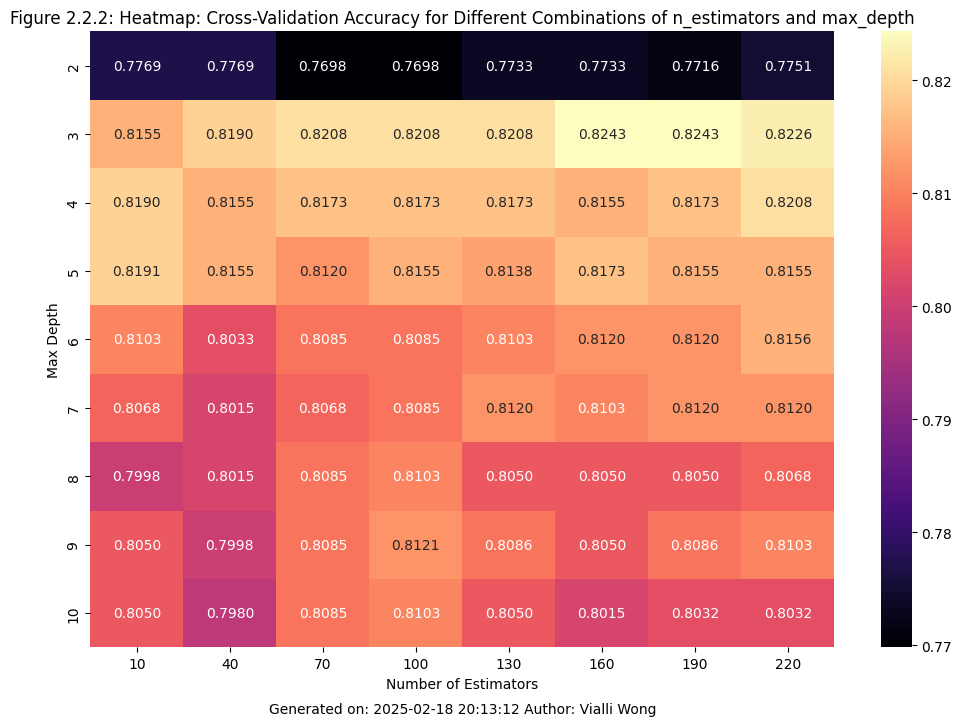

In [16]:
# Step 2.2.2 Plot the cross-validation scores for different combinations of n_estimators and max_depth
import seaborn as sns

# Extract the cross-validation scores for plotting
n_estimators_list = [key[0] for key in cv_scores.keys()]
max_depth_list = [key[1] for key in cv_scores.keys()]
cv_scores_list = list(cv_scores.values())

# Convert to numpy arrays for plotting
n_estimators_array = np.array(n_estimators_list)
max_depth_array = np.array(max_depth_list)
cv_scores_array = np.array(cv_scores_list)

# Create a meshgrid for plotting
n_estimators_grid, max_depth_grid = np.meshgrid(n_estimators_range, max_depth_range)
cv_scores_grid = np.array([cv_scores[(n, depth)] for n, depth in zip(n_estimators_grid.flatten(), max_depth_grid.flatten())])
cv_scores_grid = cv_scores_grid.reshape(n_estimators_grid.shape)

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame(cv_scores_grid, index=max_depth_range, columns=n_estimators_range)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='magma')
plt.title('Figure 2.2.2: Heatmap: Cross-Validation Accuracy for Different Combinations of n_estimators and max_depth')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')

# Add timestamp and author
plt.text(0.5, -0.1, f'Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")} Author: Vialli Wong', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

### 3.1 Display the Feature Importance Scores in Predicting Whether a Passenger Survives or Not.


In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=7)
forest.fit(X_train, y_train)

# Store Feature importance
feature_imp = pd.Series(forest.feature_importances_)

# Replace the index with the column names of the DataFrame
feature_imp.index = X_train.columns

# Sort the feature importance values in descending order of importance
feature_imp = feature_imp.sort_values(ascending=False)

# Display all information for the Series
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_imp)


Sex_female     0.382870
Pclass         0.180191
SibSp          0.139169
Parch          0.099703
Child          0.048591
Embarked_S     0.030801
Young Adult    0.027004
Embarked_C     0.024876
Adult          0.023298
Teenager       0.016881
Embarked_Q     0.014630
Senior         0.011986
dtype: float64


### 3.2 Visualization on Feature Importances

The most important feature is, sex_female, as shown in the Figure 3.2.

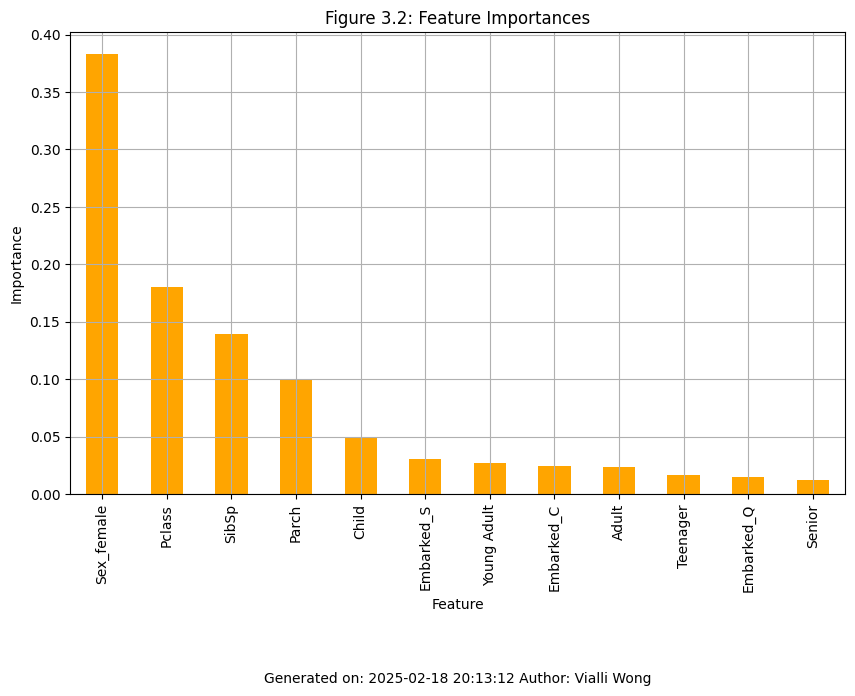

In [18]:
# Display the feature importances in a bar plot with the feature names as labels
plt.figure(figsize=(10, 6))
feature_imp.plot(kind='bar', color='orange')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Figure 3.2: Feature Importances')
plt.grid(True)
plt.text(0.5, -0.4, f'Generated on: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")} Author: Vialli Wong', 
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()